In [2]:
import torch

### Tensores 

In [3]:
# criando um tensor 
sample = torch.tensor([10,11])
sample.shape 

torch.Size([2])

In [4]:
# tensor 
x = torch.tensor([[10,11],[1,2]])
x.shape

torch.Size([2, 2])

In [5]:
# tensor 
y = torch.tensor([[10],[11]])
y.shape

torch.Size([2, 1])

In [6]:
import torch
import plotly.graph_objs as go
import plotly.offline as pyo

# criando tensor 3D
a = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

# criando a lista de valores de x, y, z no tensor  
x_vals = []
y_vals = []
z_vals = []
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        for k in range(a.shape[2]):
            x_vals.append(i)
            y_vals.append(j)
            z_vals.append(k)

# Plotly 3D scatter plot
trace = go.Scatter3d(
    x=x_vals,
    y=y_vals,
    z=z_vals,
    mode='markers',
    marker=dict(
        size=5,
        color=a.flatten(),
        colorscale='Viridis',
        opacity=0.8
    )
)

layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis=dict(title='Dimension 1'),
        yaxis=dict(title='Dimension 2'),
        zaxis=dict(title='Dimension 3')
    )
)

# crinando o tensor.html
fig = go.Figure(data=[trace], layout=layout)
pyo.plot(fig, filename='tensor.html')

'tensor.html'

### operacoes com tensores

In [8]:
# multiplicação 
x = torch.tensor([[1,2,3,4], [5,6,7,8]]) 
print(x.shape)
x*10

torch.Size([2, 4])


tensor([[10, 20, 30, 40],
        [50, 60, 70, 80]])

In [9]:
# soma 
x.add(10)

tensor([[11, 12, 13, 14],
        [15, 16, 17, 18]])

In [10]:
# reshape 
x.view(4,2)

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])

In [17]:
# squeze 
a = torch.ones(2,1,10) # tensor de numeros 1
print(a)
print('\n')
print(f"This is the shape before squeezing {a.shape}")
squeezed = a.squeeze(1)
print(f"This is the shape after squeezing {squeezed.shape}")

print('\n')
a = torch.ones(2,3,1)
print(a)
print('\n')
print(f"This is the shape before squeezing {a.shape}")
squeezed = a.squeeze(2)
print(f"This is the shape after squeezing {squeezed.shape}")

tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]])


This is the shape before squeezing torch.Size([2, 1, 10])
This is the shape after squeezing torch.Size([2, 10])


tensor([[[1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.]]])


This is the shape before squeezing torch.Size([2, 3, 1])
This is the shape after squeezing torch.Size([2, 3])


In [19]:
# unsqueze
a = torch.ones(2,3)
print(f"This is the shape before squeezing {a.shape}")
squeezed = a.unsqueeze(2)
print(f"This is the shape after unsqueezing {squeezed.shape}")

This is the shape before squeezing torch.Size([2, 3])
This is the shape after unsqueezing torch.Size([2, 3, 1])


In [20]:
# indexação como [None]
a = torch.ones(2,3)
print(a[None].shape) # eixo falso no indice 0
print(a[:,None].shape) # eixo falso no indice 1
print(a[:,:,None].shape) # eixo falso no indice 2

torch.Size([1, 2, 3])
torch.Size([2, 1, 3])
torch.Size([2, 3, 1])


In [21]:
# multiplicação de matrizes 

x = torch.tensor([[1,2,3,4],[5,6,7,8]]) # (2,4)
y = torch.tensor([[1,2,3],
                  [2,3,4],
                  [4,5,6],
                  [7,8,9]]) # (4,3)

In [22]:
# usando matmul
torch.matmul(x, y) # (2,3)

tensor([[ 45,  55,  65],
        [101, 127, 153]])

In [23]:
# concatenação 
x = torch.randn(1,4,5)
z = torch.cat([x,x], axis=1)
print('Concatenated axis 1:', x.shape, z.shape)
# tensor z = (1,8,5)

Concatenated axis 1: torch.Size([1, 4, 5]) torch.Size([1, 8, 5])


In [24]:
# permuta 
x = torch.randn(3,20,10)
z = x.permute(2,0,1)
print('Permute dimensions:', x.shape, z.shape)

Permute dimensions: torch.Size([3, 20, 10]) torch.Size([10, 3, 20])


### rede neural com PyTorch

In [39]:
import torch
from torchviz import make_dot

In [40]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]] # soma dos elementos de x

In [41]:
# Convertendo listas para tensor ( e float)
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [42]:
# verificando a gpu 
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [43]:
X = X.to(device)
Y = Y.to(device)

In [44]:
# NN = Neural Network 
import torch.nn as nn 

In [45]:
# criando a rede neural
class MyNeuralNet(nn.Module):
  def __init__(self):  

    super().__init__()
    self.layer1 = nn.Linear(2,8) # camada linear 
    self.activation = nn.ReLU() # função de ativação (relu)
    self.layer2 =  nn.Linear(8,1)

  def forward(self,x):
    x = self.layer1(x)
    x = self.activation(x)
    x = self.layer2(x)
    return x

In [46]:
model = MyNeuralNet() # criando o modelo 
model = model.to(device)

In [48]:
# visualizando a arquitetura do modelo 
make_dot(model(X), params=dict(model.named_parameters())).render("dense_network", format="png")

'dense_network.png'

In [49]:
X.shape

torch.Size([4, 2])

In [50]:
model.layer1.weight # visualizando os pesos 

Parameter containing:
tensor([[-0.3485,  0.5002],
        [-0.3071,  0.2046],
        [-0.2431, -0.4038],
        [ 0.1818, -0.5986],
        [ 0.3972, -0.6649],
        [-0.2262,  0.6030],
        [-0.4793, -0.0498],
        [ 0.2312, -0.3931]], device='cuda:0', requires_grad=True)

In [51]:
model.parameters().__next__() # visualizando os parametros 

Parameter containing:
tensor([[-0.3485,  0.5002],
        [-0.3071,  0.2046],
        [-0.2431, -0.4038],
        [ 0.1818, -0.5986],
        [ 0.3972, -0.6649],
        [-0.2262,  0.6030],
        [-0.4793, -0.0498],
        [ 0.2312, -0.3931]], device='cuda:0', requires_grad=True)

### função de ativação e perda 

In [52]:
import math

# (1/(1+e^(-x))) sigmoid
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [53]:
# RELU
import torch

class ReLU(torch.nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return torch.max(torch.zeros_like(x), x)

In [54]:
# Mean-squared error
import numpy as np

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [55]:
# Cross entropy Loss
import numpy as np

def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [74]:
import torch
import torch.nn as nn
from torch.optim import SGD
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
# data set (prever y usando x)
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]] # soma dos elementos de x 

In [76]:
# pre processamento (covertendo para tensor e para float)
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [77]:
# verificando a gpu 
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)
device

'cuda'

In [78]:
# criando a arquitetura da rede neural 
class MyNeuralNet(nn.Module):
  def __init__(self):  
    
    super().__init__()
    self.layer1 = nn.Linear(2,8) # camada linear
    self.activation = nn.ReLU() # função de ativação 
    self.layer2 =  nn.Linear(8,1)

  def forward(self,x):
    x = self.layer1(x)
    x = self.activation(x)
    x = self.layer2(x)
    return x

In [79]:
# criando o modelo 
model = MyNeuralNet()
model = model.to(device)

In [80]:
# função de perda 
loss_func = nn.MSELoss()

In [81]:
# otimizador 
opt = SGD(model.parameters(), lr = 0.001)

In [82]:
# loop de treinamento da rede 
losses = []
for _ in range(50): # 50 iterações 
  opt.zero_grad() # gradiente = 0 a cada iteração 
  loss_value = loss_func(model(X),Y)
  loss_value.backward()

  # atualiza os pesos e bias 
  opt.step() 
  losses.append(loss_value.detach().cpu().numpy())

Text(0, 0.5, 'loss value')

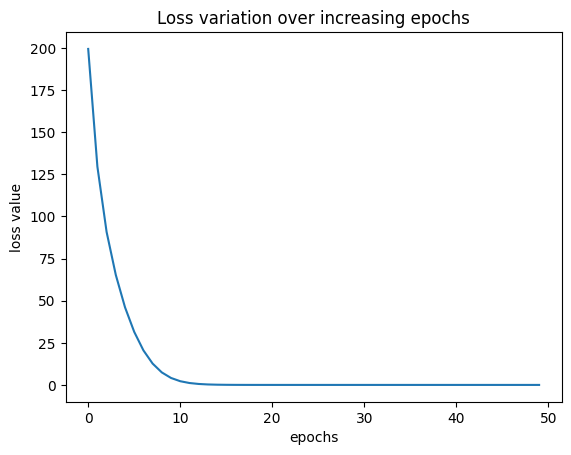

In [83]:
# plotando a perda 
plt.plot(losses)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

### data set e data loader

In [84]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn

# criando os datasets e fazendo o preprocessamento dos dados 
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]
X = torch.tensor(x).float()
Y = torch.tensor(y).float()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)
device

'cuda'

In [85]:
class MyDataset(Dataset):
    def __init__(self, x, y):
        # Converte os dados de entrada (x) e saída (y) para tensores do PyTorch
        # e os move para o dispositivo especificado (CPU ou GPU)
        self.x = torch.tensor(x).float().to(device)
        self.y = torch.tensor(y).float().to(device)

    def __len__(self):
        # Retorna o tamanho do dataset, ou seja, o número de amostras
        return len(self.x)

    def __getitem__(self, ix):
        # Retorna a amostra de dados e o rótulo correspondente no índice especificado (ix)
        return self.x[ix], self.y[ix]

In [86]:
ds = MyDataset(x,y)

In [87]:
# dataloader 
dl = DataLoader(ds, batch_size=2, shuffle=True)

In [89]:
# carregando os dados 
for x,y in dl:
  print(x,y)

tensor([[3., 4.],
        [5., 6.]], device='cuda:0') tensor([[ 7.],
        [11.]], device='cuda:0')
tensor([[1., 2.],
        [7., 8.]], device='cuda:0') tensor([[ 3.],
        [15.]], device='cuda:0')


In [90]:
import torch
import torch.nn as nn
from torch.optim import SGD

In [91]:
# arquitetur da rede neural 
class MyNeuralNet(nn.Module):
  def __init__(self):  
    super().__init__()
    self.layer1 = nn.Linear(2,8) # camada linear 
    self.activation = nn.ReLU() # função de ativação 
    self.layer2 =  nn.Linear(8,1)

  def forward(self,x):
    x = self.layer1(x)
    x = self.activation(x)
    x = self.layer2(x)
    return x

In [93]:
model = MyNeuralNet()
model = model.to(device)
loss_func = nn.MSELoss() # funçaõ de perda 
opt = SGD(model.parameters(), lr = 0.001) # otimização 

In [94]:
losses = []
for _ in range(50): # 50 iterações 
  for data in dl:
    opt.zero_grad() # gradiente = 0 a cada iteração 
    x1, y1 = data
    loss_value = loss_func(model(x1),y1)
    loss_value.backward()

    # atualizando pesos e bias 
    opt.step() 
    losses.append(loss_value.detach().cpu().numpy())

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import SGD
import matplotlib.pyplot as plt
%matplotlib inline

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# criando os datasets e fazendo o preprocessamento dos dados 
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

class MyDataset(Dataset):
    def __init__(self, x, y):
        # Converte os dados de entrada (x) e saída (y) para tensores do PyTorch
        # e os move para o dispositivo especificado (CPU ou GPU)
        self.x = torch.tensor(x).float().to(device)
        self.y = torch.tensor(y).float().to(device)

    def __len__(self):
        # Retorna o tamanho do dataset, ou seja, o número de amostras
        return len(self.x)

    def __getitem__(self, ix):
        # Retorna a amostra de dados e o rótulo correspondente no índice especificado (ix)
        return self.x[ix], self.y[ix]
    
ds = MyDataset(x, y)
dl = DataLoader(ds, batch_size = 2, shuffle = True)

In [3]:
# modelo sequencial 
model = nn.Sequential(nn.Linear(2, 8),
                      nn.ReLU(),
                      nn.Linear(8, 1)).to(device)

model

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)

In [10]:
loss_func = nn.MSELoss()

opt = SGD(model.parameters(), lr = 0.001)
import time 
loss_history = []
start = time.time()

# treinando o modelo 
model.train()
for _ in range(50): # 50 iterações 
  for ix, iy in dl:
    opt.zero_grad() # gradiente = 0 a cada iteração 
    loss_value = loss_func(model(ix),iy)
    loss_value.backward()

    # atualizando pesos e bias 
    opt.step() 
    loss_history.append(loss_value)

end = time.time()
print(end - start)

0.05140876770019531


In [11]:
# prevendo com dataset de validação 
val =  [[8,9],[10,11],[1.5,2.5]]
model(torch.tensor(val).float().to(device))

tensor([[16.7004],
        [20.4861],
        [ 4.3969]], device='cuda:0', grad_fn=<AddmmBackward0>)

### processamento de imagem 

In [12]:
!wget https://i.scdn.co/image/ab6761610000e5eb31f6ab67e6025de876475814

--2024-08-26 00:34:22--  https://i.scdn.co/image/ab6761610000e5eb31f6ab67e6025de876475814
Resolvendo i.scdn.co (i.scdn.co)... 2.19.10.55, 2.19.10.22, 2.19.10.36, ...
Conectando-se a i.scdn.co (i.scdn.co)|2.19.10.55|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 99347 (97K) [image/jpeg]
Salvando em: ‘ab6761610000e5eb31f6ab67e6025de876475814’

ab6761610000e5eb31f 100%[===================>]  97,02K  --.-KB/s    em 0,04s   

2024-08-26 00:34:33 (2,35 MB/s) - ‘ab6761610000e5eb31f6ab67e6025de876475814’ salvo [99347/99347]



In [14]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

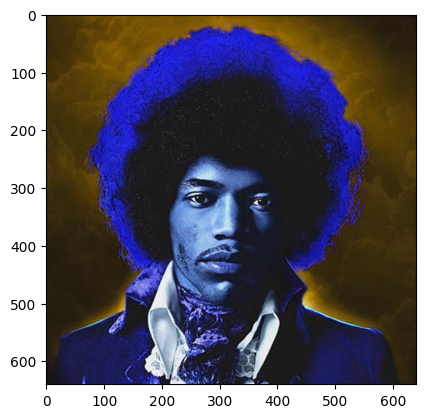

In [15]:
# lendo imagem usando OpenCV 
img = cv.imread('ab6761610000e5eb31f6ab67e6025de876475814')

# plotando 
plt.imshow(img)

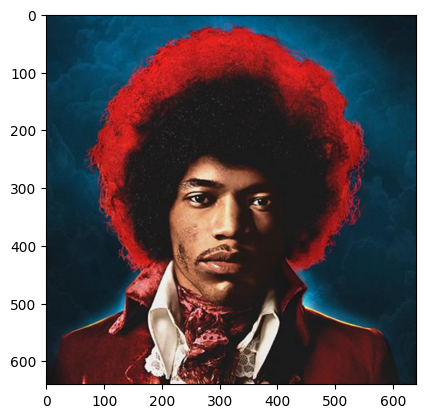

In [16]:
# deixando a imagem com RGB usando OpenCV
rgb_image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(rgb_image)

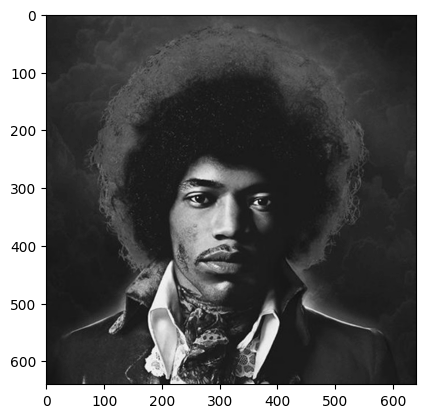

In [17]:
# convertendo para escala de cinza 
gray_image = cv.cvtColor(rgb_image, cv.COLOR_RGB2GRAY)
plt.imshow(gray_image,cmap='gray')

In [18]:
rgb_image.shape, gray_image.shape

((640, 640, 3), (640, 640))

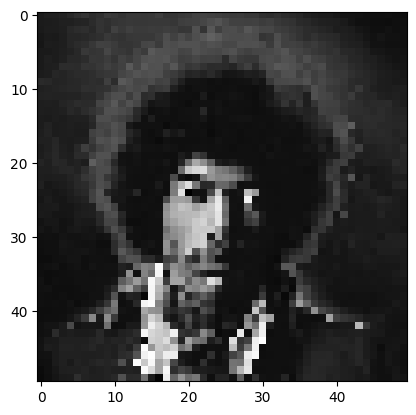

In [19]:
# alterando o tamanho da imagem com OpenCV
img_gray_small = cv.resize(gray_image,(50,50)) # 50x50
plt.imshow(img_gray_small, cmap='gray')

In [20]:
img_gray_small.shape

(50, 50)

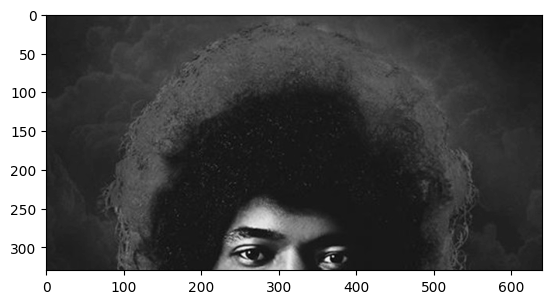

In [23]:
# cortando a imagem
plt.imshow(gray_image[10:340,:], cmap='gray')

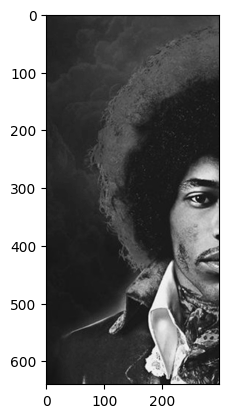

In [24]:
plt.imshow(gray_image[:,:300], cmap='gray')

In [25]:
from torchvision import datasets
import torch
data_folder = '~/data/FMNIST'
fmnist = datasets.FashionMNIST(data_folder, download=True,train=True)

100.0%


Extracting /home/williansoder/data/FMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to /home/williansoder/data/FMNIST/FashionMNIST/raw



100.0%


Extracting /home/williansoder/data/FMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /home/williansoder/data/FMNIST/FashionMNIST/raw



100.0%


Extracting /home/williansoder/data/FMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /home/williansoder/data/FMNIST/FashionMNIST/raw



100.0%

Extracting /home/williansoder/data/FMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /home/williansoder/data/FMNIST/FashionMNIST/raw



In [26]:
# dados necessarios do dataset
tr_images = fmnist.data
tr_targets = fmnist.targets

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

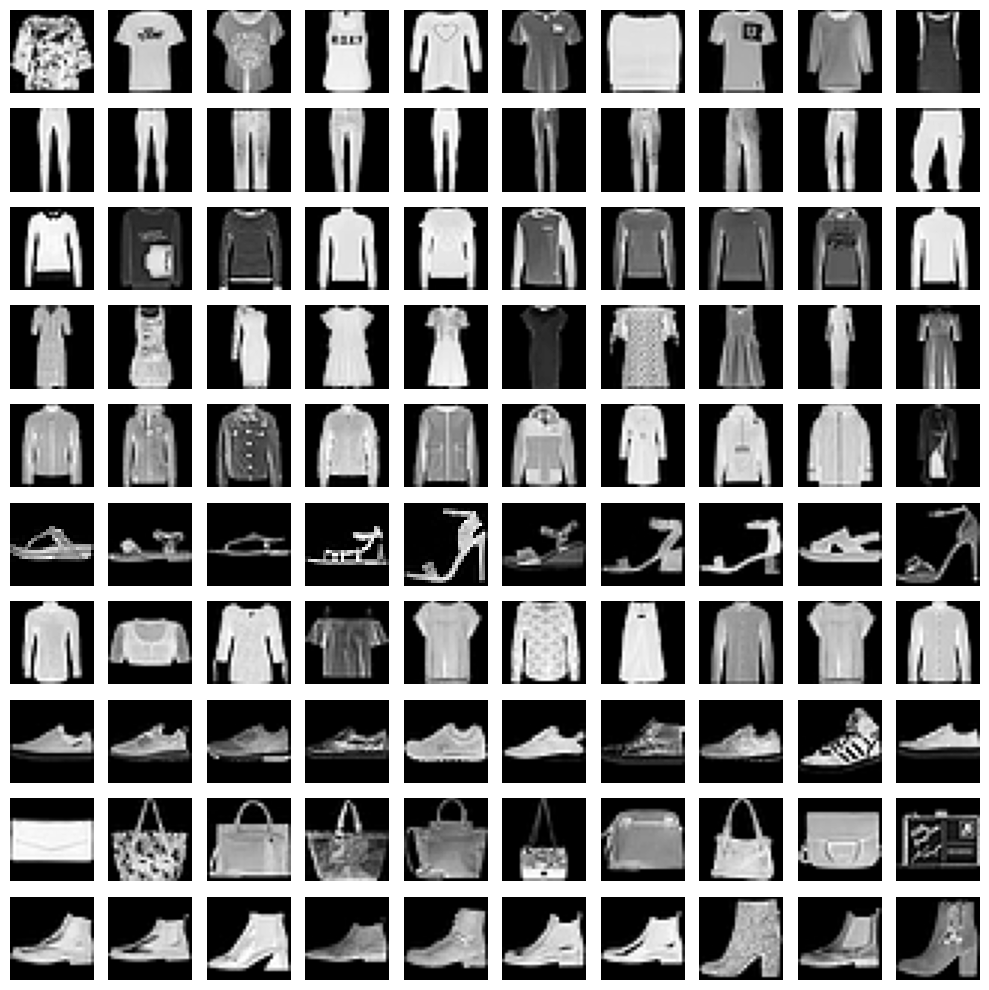

In [28]:
# exibindo imagens do dataset 
R, C = len(tr_targets.unique()), 10
fig, ax = plt.subplots(R, C, figsize=(10,10))
for label_class, plot_row in enumerate(ax):    
  label_x_rows = np.where(tr_targets == label_class)[0]
  for plot_cell in plot_row:
    plot_cell.grid(False); plot_cell.axis('off')
    ix = np.random.choice(label_x_rows)
    x, y = tr_images[ix], tr_targets[ix]
    plot_cell.imshow(x, cmap='gray')
plt.tight_layout()

In [29]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
device = "cuda" if torch.cuda.is_available() else "cpu"
from torchvision import datasets
device

'cuda'

In [30]:
# fazendo o preprocessamento dos dados
class FMNISTDataset(Dataset):
  def __init__(self,x,y):
    x = x.float()
    x = x.view(-1,28*28)
    self.x, self.y = x,y
  def __getitem__(self,idx):
    x,y = self.x[idx], self.y[idx]
    return x.to(device), y.to(device)
  def __len__(self):
    return len(self.x)

In [31]:
# cria e retorna um dataloader 
def get_data():     
  train = FMNISTDataset(tr_images, tr_targets)     
  trn_dl = DataLoader(train, batch_size=32, shuffle=True)    
  return trn_dl

In [32]:
# criando o modelo
from torch.optim import SGD
def get_model():    
  model = nn.Sequential(                
      nn.Linear(28 * 28, 1000),                
      nn.ReLU(),                
      nn.Linear(1000, 10)            
      ).to(device)    
  loss_fn = nn.CrossEntropyLoss() # funcao de perda  
  optimizer = SGD(model.parameters(), lr=1e-2) # otimizador  
  return model, loss_fn, optimizer

In [33]:
@torch.no_grad()
# calcula a precisao do modelo 
def accuracy(x, y, model):    
  model.eval() 
  prediction = model(x)
  max_values, argmaxes = prediction.max(-1)    
  is_correct = argmaxes == y    
  return is_correct.cpu().numpy().tolist()

In [34]:
# realiza uma etapa de treinamento para um unico lote
def train_batch(x, y, model, opt, loss_fn):
    model.train()    
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    # libera a memória do gradiente
    optimizer.zero_grad()
    return batch_loss.item()

In [35]:
trn_dl = get_data()
model, loss_fn, optimizer = get_model()

In [36]:
losses, accuracies = [], []
# treinando o modelo 
for epoch in range(5):
    print(epoch)
    epoch_losses, epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        epoch_losses.append(batch_loss)
    epoch_loss = np.array(epoch_losses).mean()
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        epoch_accuracies.extend(is_correct)
    epoch_accuracy = np.mean(epoch_accuracies)
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)

0
1
2
3
4


/tmp/ipykernel_4255/185156303.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


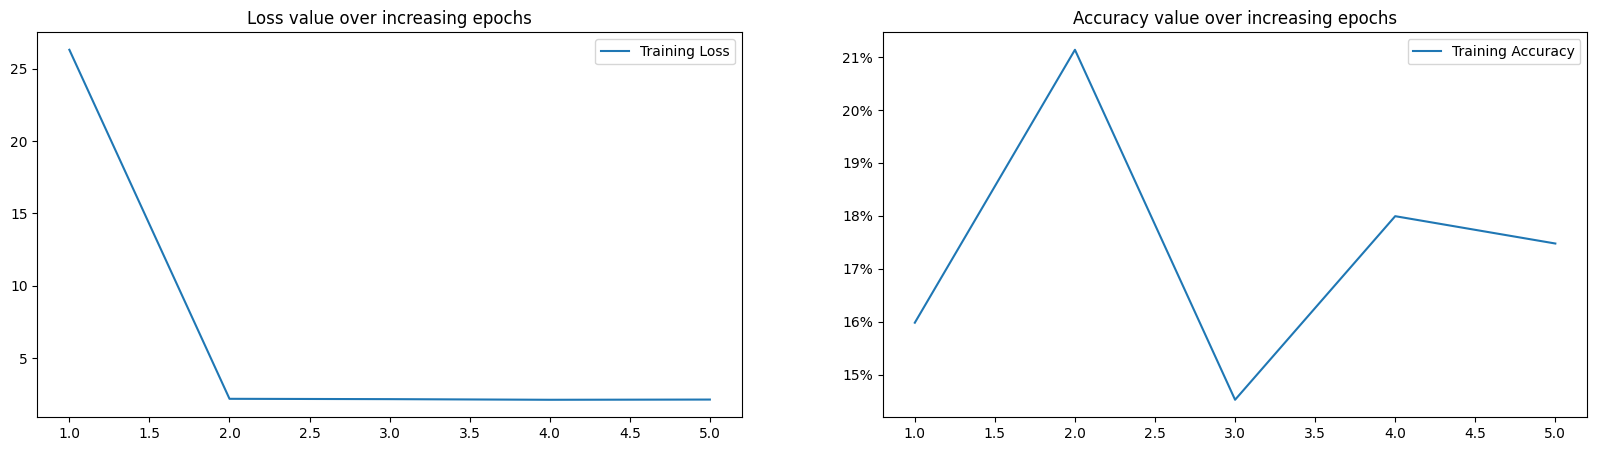

In [37]:
# plotando graficamente os resultados do modelo 
epochs = np.arange(5)+1
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Loss value over increasing epochs')
plt.plot(epochs, losses, label='Training Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy value over increasing epochs')
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend() 

### otimizadores 

In [39]:
# repetindo os processos anteriores 
import torch
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)
tr_images = fmnist.data
tr_targets = fmnist.targets
val_fmnist = datasets.FashionMNIST(data_folder, download=True, train=False)
val_images = val_fmnist.data
val_targets = val_fmnist.targets

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [41]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()/255
        x = x.view(-1,28*28)
        self.x, self.y = x, y 
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix] 
        return x.to(device), y.to(device)
    def __len__(self): 
        return len(self.x)

from torch.optim import SGD, Adam
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    return model, loss_fn

def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

def accuracy(x, y, model):
    model.eval()
    # this is the same as @torch.no_grad 
    # at the top of function, only difference
    # being, grad is not computed in the with scope
    with torch.no_grad():
        prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()
def get_data(): 
    train = FMNISTDataset(tr_images, tr_targets) 
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    val = FMNISTDataset(val_images, val_targets) 
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=False)
    return trn_dl, val_dl

@torch.no_grad()
def val_loss(x, y, model):
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

def train():
  train_losses, train_accuracies = [], []
  val_losses, val_accuracies = [], []
  for epoch in range(10):
      print(epoch)
      train_epoch_losses, train_epoch_accuracies = [], []
      for ix, batch in enumerate(iter(trn_dl)):
          x, y = batch
          batch_loss = train_batch(x, y, model, optimizer, loss_fn)
          train_epoch_losses.append(batch_loss) 
      train_epoch_loss = np.array(train_epoch_losses).mean()

      for ix, batch in enumerate(iter(trn_dl)):
          x, y = batch
          is_correct = accuracy(x, y, model)
          train_epoch_accuracies.extend(is_correct)
      train_epoch_accuracy = np.mean(train_epoch_accuracies)
      for ix, batch in enumerate(iter(val_dl)):
          x, y = batch
          val_is_correct = accuracy(x, y, model)
          validation_loss = val_loss(x, y, model)
      val_epoch_accuracy = np.mean(val_is_correct)
      train_losses.append(train_epoch_loss)
      train_accuracies.append(train_epoch_accuracy)
      val_losses.append(validation_loss)
      val_accuracies.append(val_epoch_accuracy)
  return train_losses,train_accuracies,val_losses,val_accuracies

In [42]:
trn_dl, val_dl = get_data()
model, loss_fn = get_model()

In [43]:
# Descida Gradiente Estocástica
optimizer = SGD(model.parameters(), lr=1e-2)
train_losses,train_accuracies,val_losses,val_accuracies = train()

0
1
2
3
4
5
6
7
8
9


In [44]:
# funcao para plotar o resultados de perda e acuracia (SGD)
def plot():
  epochs = np.arange(10)+1
  import matplotlib.ticker as mtick
  import matplotlib.pyplot as plt
  import matplotlib.ticker as mticker
  %matplotlib inline
  plt.subplot(211)
  plt.plot(epochs, train_losses, 'bo', label='Training loss')
  plt.plot(epochs, val_losses, 'r', label='Validation loss')
  plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
  plt.title('Training and validation loss with SGD optimizer')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid('off')
  plt.show()
  plt.subplot(212)
  plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
  plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
  plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
  plt.title('Training and validation accuracy with SGD optimizer')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
  plt.legend()
  plt.grid('off')
  plt.show()

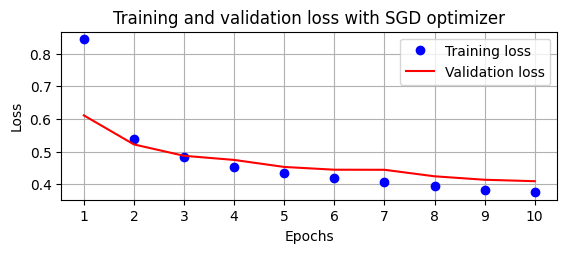

/tmp/ipykernel_4255/878612311.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


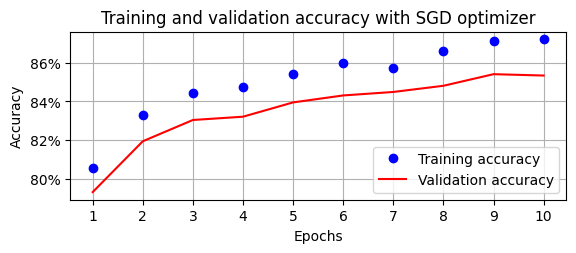

In [45]:
plot()

In [46]:
trn_dl, val_dl = get_data()
model, loss_fn = get_model()
# otimizador adam 
optimizer = Adam(model.parameters(), lr=1e-2)
# treinando a rede 
train_losses,train_accuracies,val_losses,val_accuracies = train()

0
1
2
3
4
5
6
7
8
9


In [47]:
# funcao para plotar o resultados de perda e acuracia (ADAM)
def plot():
  epochs = np.arange(10)+1
  import matplotlib.ticker as mtick
  import matplotlib.pyplot as plt
  import matplotlib.ticker as mticker
  %matplotlib inline
  plt.subplot(211)
  plt.plot(epochs, train_losses, 'bo', label='Training loss')
  plt.plot(epochs, val_losses, 'r', label='Validation loss')
  plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
  plt.title('Training and validation loss with ADAM optimizer')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid('off')
  plt.show()
  plt.subplot(212)
  plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
  plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
  plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
  plt.title('Training and validation accuracy with ADAM optimizer')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
  plt.legend()
  plt.grid('off')
  plt.show()

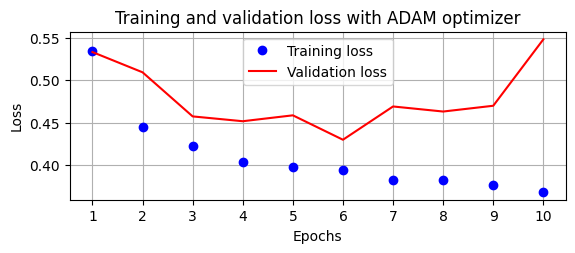

/tmp/ipykernel_4255/699662024.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


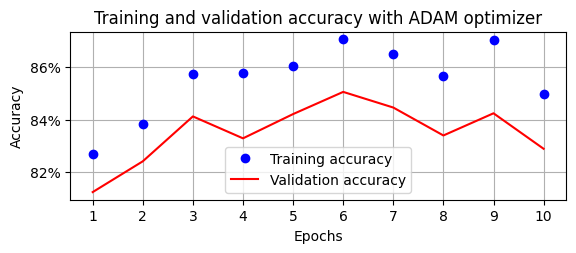

In [48]:
plot()

### taxa de aprendizado 

In [49]:
# repetindo os processos de criação do modelo 
from torchvision import datasets
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)

tr_images = fmnist.data
tr_targets = fmnist.targets
val_fmnist = datasets.FashionMNIST(data_folder, download=True, train=False)
val_images = val_fmnist.data
val_targets = val_fmnist.targets

class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()/255
        x = x.view(-1,28*28)
        self.x, self.y = x, y 
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix] 
        return x.to(device), y.to(device)
    def __len__(self): 
        return len(self.x)
    
def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

def accuracy(x, y, model):
    model.eval()
    with torch.no_grad():
        prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

def get_data(): 
    train = FMNISTDataset(tr_images, tr_targets) 
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    val = FMNISTDataset(val_images, val_targets) 
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=False)
    return trn_dl, val_dl

@torch.no_grad()
def val_loss(x, y, model):
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

def train():
  train_losses, train_accuracies = [], []
  val_losses, val_accuracies = [], []
  for epoch in range(5):
      print(epoch)
      train_epoch_losses, train_epoch_accuracies = [], []
      for ix, batch in enumerate(iter(trn_dl)):
          x, y = batch
          batch_loss = train_batch(x, y, model, optimizer, loss_fn)
          train_epoch_losses.append(batch_loss) 
      train_epoch_loss = np.array(train_epoch_losses).mean()

      for ix, batch in enumerate(iter(trn_dl)):
          x, y = batch
          is_correct = accuracy(x, y, model)
          train_epoch_accuracies.extend(is_correct)
      train_epoch_accuracy = np.mean(train_epoch_accuracies)
      for ix, batch in enumerate(iter(val_dl)):
          x, y = batch
          val_is_correct = accuracy(x, y, model)
          validation_loss = val_loss(x, y, model)
      val_epoch_accuracy = np.mean(val_is_correct)
      train_losses.append(train_epoch_loss)
      train_accuracies.append(train_epoch_accuracy)
      val_losses.append(validation_loss)
      val_accuracies.append(val_epoch_accuracy)

  return train_losses,train_accuracies,val_losses,val_accuracies

In [50]:
# taxa de aprendizagem ALTA (1e-1)
from torch.optim import SGD, Adam
def get_model(learning_rate):
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=learning_rate)
    return model, loss_fn, optimizer

trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model(1e-1) # 1e-1

train_losses,train_accuracies,val_losses,val_accuracies = train()

0
1
2
3
4


In [51]:
# funçao para plotar os resultados graficamente as taxa de aprendizado em relação a alta taxa de aprendizagem (1e-1)
def plot(lr):  
  epochs = np.arange(5)+1
  import matplotlib.ticker as mtick
  import matplotlib.pyplot as plt
  import matplotlib.ticker as mticker
  %matplotlib inline
  plt.subplot(211)
  plt.plot(epochs, train_losses, 'bo', label='Training loss')
  plt.plot(epochs, val_losses, 'r', label='Validation loss')
  plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
  plt.title(f'Training and validation loss with {lr} learning rate')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid('off')
  plt.show()
  plt.subplot(212)
  plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
  plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
  plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
  plt.title('Training and validation accuracy with 0.1 learning rate')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
  plt.legend()
  plt.grid('off')
  plt.show()

In [52]:
# taxa de aprendizagem media (1e-3)
model, loss_fn, optimizer = get_model(1e-3)
train_losses,train_accuracies,val_losses,val_accuracies = train()

0
1
2
3
4


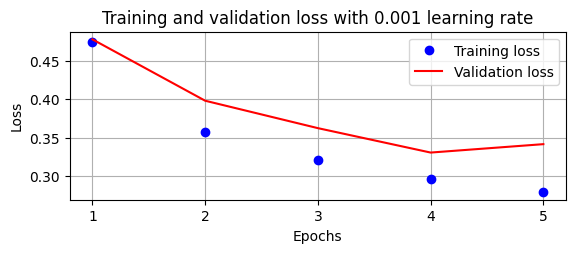

/tmp/ipykernel_4255/1471063042.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


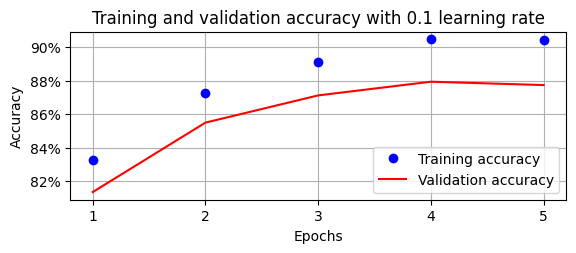

In [53]:
plot(1e-3) # MEDIA (0.001) x ALTA (0.1)

In [54]:
# taxa de aprendizagem baixa (1e-5)
model, loss_fn, optimizer = get_model(1e-5)
train_losses,train_accuracies,val_losses,val_accuracies = train()

0
1
2
3
4


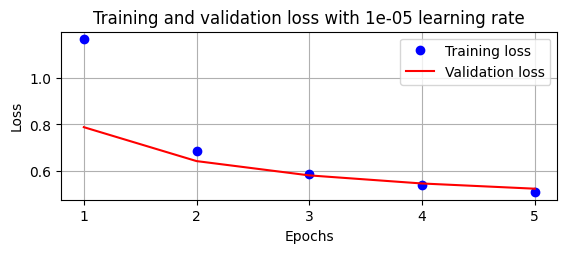

/tmp/ipykernel_4255/1471063042.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


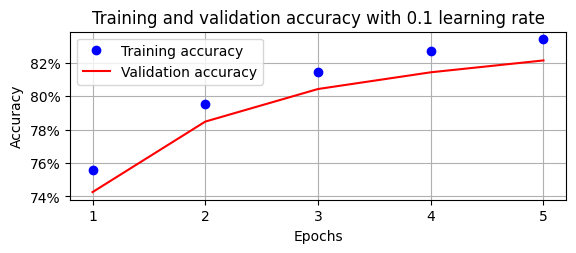

In [55]:
# ALTA x BAIXA
plot(1e-5)

### Deep Neural Network

In [56]:
# carrgeando o dataset 
# treino 
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)
tr_images = fmnist.data
tr_targets = fmnist.targets
# teste 
val_fmnist = datasets.FashionMNIST(data_folder, download=True, train=False)
val_images = val_fmnist.data
val_targets = val_fmnist.targets

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from torch.optim import SGD, Adam
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [58]:
# CRIANDO MODELO COM DUAS CAMADAS OCULTAS ( e repetindo os processos anteriores)
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()
        x = x.view(-1,28*28)/255
        self.x, self.y = x, y 
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix] 
        return x.to(device), y.to(device)
    def __len__(self): 
        return len(self.x)
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer

def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()
def accuracy(x, y, model):
    model.eval()
    # this is the same as @torch.no_grad 
    with torch.no_grad():
        prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

@torch.no_grad()
def val_loss(x, y, model):
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

def get_data(): 
    train = FMNISTDataset(tr_images, tr_targets) 
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    val = FMNISTDataset(val_images, val_targets) 
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=False)
    return trn_dl, val_dl

In [59]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model() # criando  o modelo 

In [60]:
# treinando o modelo
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5): # 5 iteraçoes 
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4


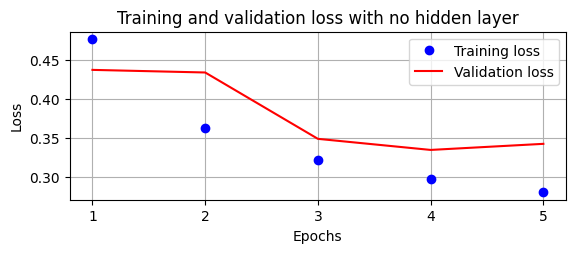

/tmp/ipykernel_4255/3779125715.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


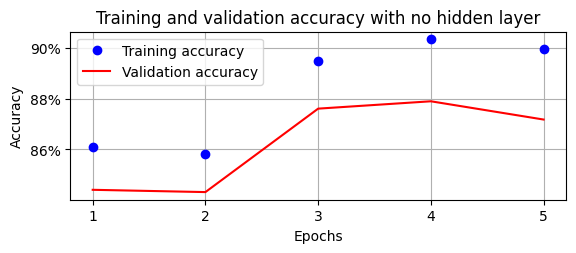

In [61]:
# plotando os resultados obtidos com a rede de 2 camadas ocultas 
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with no hidden layer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with no hidden layer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

### normalizando 

In [62]:
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
device = "cuda" if torch.cuda.is_available() else "cpu"
import numpy as np
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)
tr_images = fmnist.data
tr_targets = fmnist.targets

In [63]:
# dividindo por 255 para dimensionar os dados
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()/255
        x = x.view(-1,28*28)
        self.x, self.y = x, y 
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix] 
        return x.to(device), y.to(device)
    def __len__(self): 
        return len(self.x)

In [64]:
# criando modelo e as funcoes necessarias 
def get_data(): 
    train = FMNISTDataset(tr_images, tr_targets) 
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    return trn_dl
from torch.optim import SGD
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr=1e-2)
    return model, loss_fn, optimizer


def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    # calculando perda
    batch_loss = loss_fn(prediction, y)
    # calcula os gradientes
    batch_loss.backward()
    # aplica os pesos novos 
    optimizer.step()
    # libera memoria para o proximo lote 
    optimizer.zero_grad()
    return batch_loss.item()
def accuracy(x, y, model):
    model.eval()
    with torch.no_grad():
        prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()
trn_dl = get_data()
model, loss_fn, optimizer = get_model()
# treinando o modelo 
losses, accuracies = [], []
for epoch in range(5):
    print(epoch)
    epoch_losses, epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        epoch_losses.append(batch_loss)
    epoch_loss = np.array(epoch_losses).mean()
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        epoch_accuracies.extend(is_correct)
    epoch_accuracy = np.mean(epoch_accuracies)
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)

0
1
2
3
4


/tmp/ipykernel_4255/1702038212.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


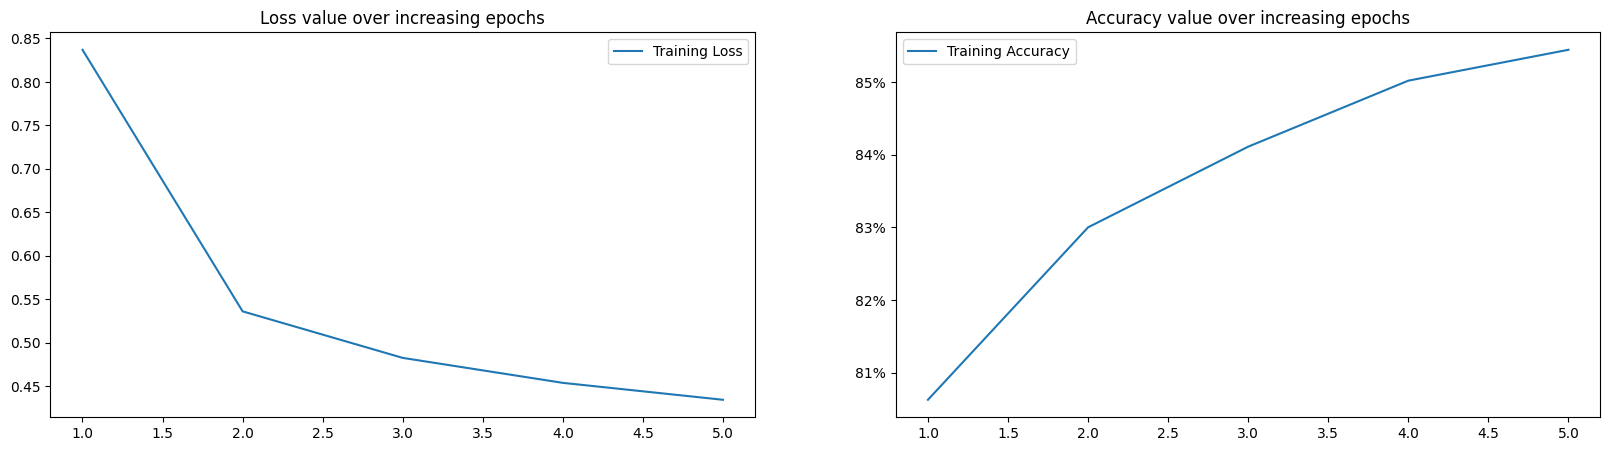

In [65]:
# plotando resultados 
epochs = np.arange(5)+1
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Loss value over increasing epochs')
plt.plot(epochs, losses, label='Training Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy value over increasing epochs')
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()

### CNN

In [1]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
# criando os dados de treino e preparando 
X_train = torch.tensor([[[[4, 5, 6, 7], [5, 6, 7, 8], [8, 9, 10, 11], [4, 6, 7, 8]]], [[[-4, 5, 6, -7], [5, -6, 7, 8], [-8, 9, -10, 11], [-4, -6, -7, -8]]]]).float().to(device)
X_train.div_(8)
y_train = torch.tensor([0, 1]).float().to(device)

cuda


In [2]:
X_train.shape, y_train.shape 

(torch.Size([2, 1, 4, 4]), torch.Size([2]))

In [3]:
import torch
import torch.nn as nn
from torch.optim import Adam

# construindo o modelo 
def get_model():
    model = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3),
        nn.MaxPool2d(kernel_size=2),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(1,1),
        nn.Sigmoid()
    ).to(device)

    loss_fn = nn.BCELoss()
    optimizer = Adam(model.parameters(), lr=0.01)

    return model, loss_fn, optimizer

In [4]:
model, criterion, optimizer = get_model()
model

Sequential(
  (0): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): ReLU()
  (3): Flatten(start_dim=1, end_dim=-1)
  (4): Linear(in_features=1, out_features=1, bias=True)
  (5): Sigmoid()
)

In [5]:
import torch
# realiza o treinamento em um unico batch 
def train_batch(x, y, model, optimizer, loss_fn):
    model.train()
    optimizer.zero_grad()
    prediction = model(x)
    batch_loss = loss_fn(prediction.squeeze(), y.squeeze())
    batch_loss.backward()
    optimizer.step()
    return batch_loss.item()

In [6]:
from torch.utils.data import TensorDataset, Dataset, DataLoader

trn_dl = DataLoader(TensorDataset(X_train, y_train))

In [7]:
import torch
# realizando o treinamento da rede 
for epoch in range(2000):
    for ix, batch in enumerate(trn_dl):
        x, y = batch
        x = x.to(device)
        y = y.to(device)
        batch_loss = train_batch(x, y, model, optimizer, criterion)

In [8]:
model(X_train[:1])

tensor([[0.5001]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [11]:
import imgaug.augmenters as iaa
from torchvision import datasets
import torch
data_folder = '~/data/FMNIST'
fmnist = datasets.FashionMNIST(data_folder, download=True,train=True)

In [12]:
# criando dados de treino 
tr_images = fmnist.data
tr_targets = fmnist.targets

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device
# preprocessamento de dados 
def to_numpy(tensor):
    return tensor.cpu().detach().numpy()

Text(0.5, 1.0, 'Original image')

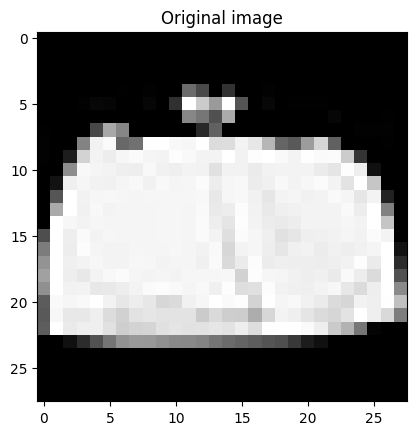

In [14]:
# exibindo imagem do data set 
plt.imshow(tr_images[109], cmap='gray')
plt.title('Original image')

Text(0.5, 1.0, 'Scaled image')

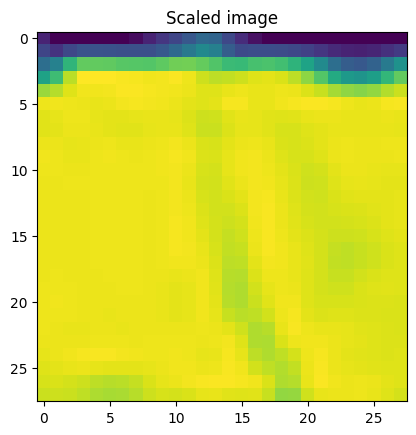

In [15]:
# printando a mesma imagem porem escalada usando o 'imgaug'
aug = iaa.Affine(scale=2)
plt.imshow(aug.augment_image(to_numpy(tr_images[109])))
plt.title('Scaled image')

Text(0.5, 1.0, 'Translated image by 10 pixels (right and bottom)')

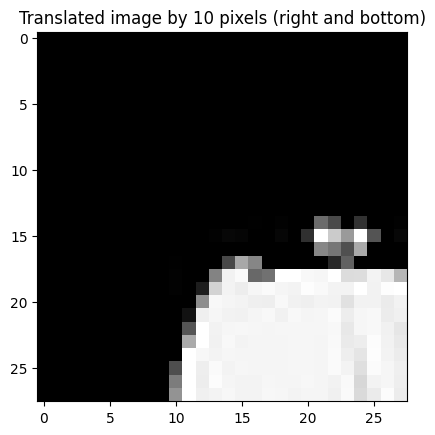

In [16]:
# imagem 10 pixel 
aug = iaa.Affine(translate_px=10)
plt.imshow(aug.augment_image(to_numpy(tr_images[109])), cmap='gray')
plt.title('Translated image by 10 pixels (right and bottom)')

Text(0.5, 1.0, 'Translation of 10 pixels \nacross columns and 2 pixels over rows')

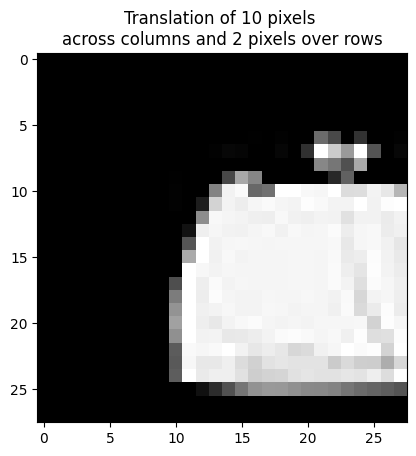

In [17]:
# 10 pixels nas colunas e 2 nas linhas 
aug = iaa.Affine(translate_px={'x':10,'y':2})
plt.imshow(aug.augment_image(to_numpy(tr_images[109])), cmap='gray')
plt.title('Translation of 10 pixels \nacross columns and 2 pixels over rows')

Text(0.5, 1.0, 'Rotation of image by 30 degrees')

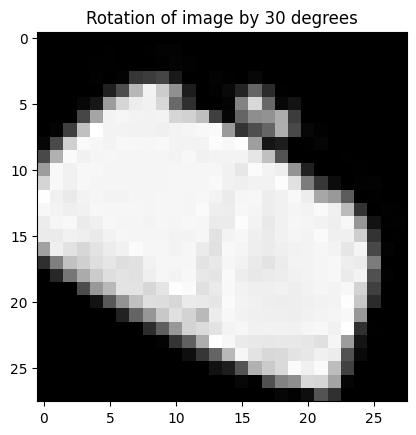

In [18]:
# imagem rotacionada em 30 garus 
aug = iaa.Affine(rotate=30)
plt.imshow(aug.augment_image(to_numpy(tr_images[109])), cmap='gray')
plt.title('Rotation of image by 30 degrees')

Text(0.5, 1.0, 'Rotation of image by -30 degrees')

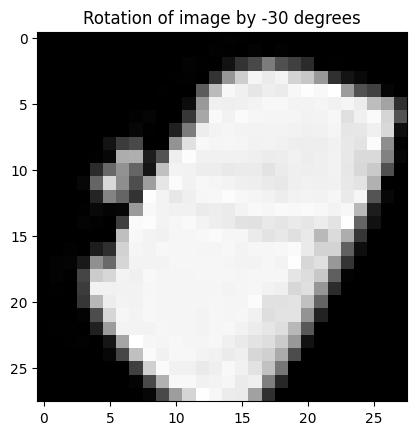

In [19]:
# imagem rotacionada em -30 garus 
aug = iaa.Affine(rotate=-60)
plt.imshow(aug.augment_image(to_numpy(tr_images[109])), cmap='gray')
plt.title('Rotation of image by -30 degrees')

Text(0.5, 1.0, 'Shear of image \nby 30 degrees')

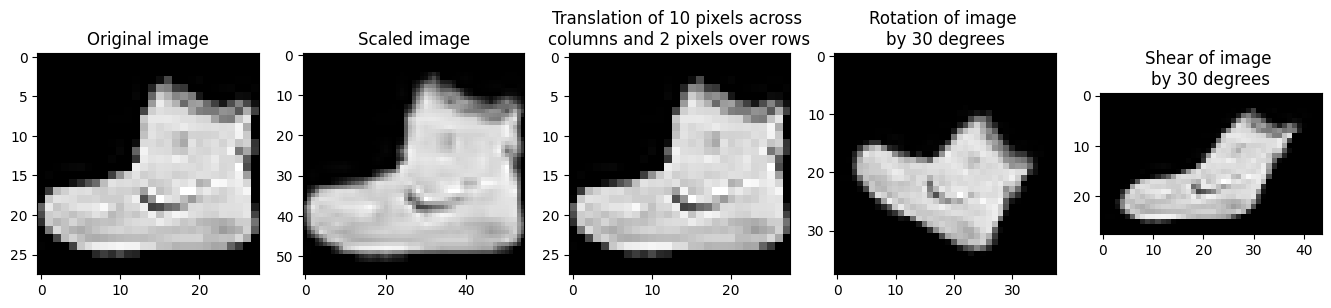

In [20]:
# repetindo os mesmos processos acima para outra imagem 
plt.figure(figsize=(20,20))
plt.subplot(161)
plt.imshow(tr_images[0], cmap='gray')
plt.title('Original image')
plt.subplot(162)
aug = iaa.Affine(scale=2, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Scaled image')
plt.subplot(163)
aug = iaa.Affine(translate_px={'x':10,'y':2}, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Translation of 10 pixels across \ncolumns and 2 pixels over rows')
plt.subplot(164)
aug = iaa.Affine(rotate=30, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image \nby 30 degrees')
plt.subplot(165)
aug = iaa.Affine(shear=30, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Shear of image \nby 30 degrees')

Text(0.5, 1.0, 'Random 20% salt and pepper noise')

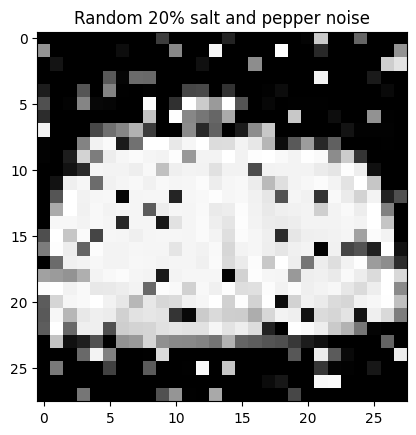

In [21]:
# plotando imagem com 20% de ruido 
aug = iaa.SaltAndPepper(0.2)
plt.imshow(aug.augment_image(to_numpy(tr_images[109])), cmap='gray',vmin = 0, vmax = 255)
plt.title('Random 20% salt and pepper noise')

Text(0.5, 1.0, 'Random 20% salt and pepper noise')

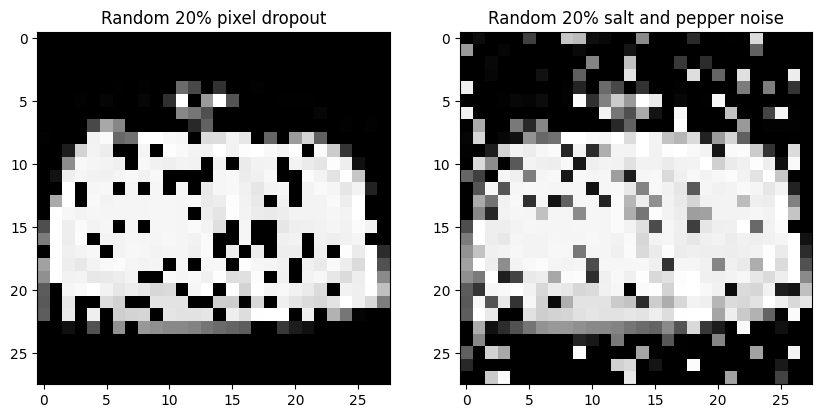

In [22]:
plt.figure(figsize=(10,10))
plt.subplot(121)
aug = iaa.Dropout(p=0.2,)
plt.imshow(aug.augment_image(to_numpy(tr_images[109])), cmap='gray',vmin = 0, vmax = 255)
plt.title('Random 20% pixel dropout') # tirando 20% dos pixel 
plt.subplot(122)
aug = iaa.SaltAndPepper(0.2,)
plt.imshow(aug.augment_image(to_numpy(tr_images[109])), cmap='gray',vmin = 0, vmax = 255)
plt.title('Random 20% salt and pepper noise') # ruido de 20%

Text(0.5, 1.0, 'Pixels multiplied by 0.5')

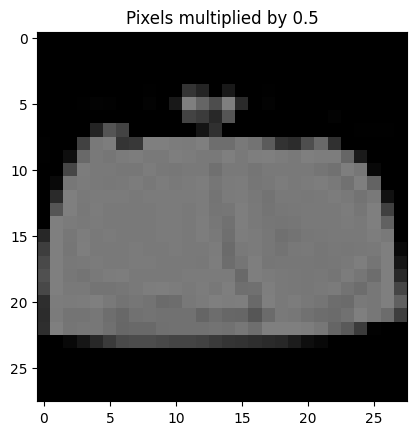

In [23]:
# diminuindo o brilho da imagem 
aug = iaa.Multiply(0.5)
plt.imshow(aug.augment_image(to_numpy(tr_images[109])), cmap='gray',vmin = 0, vmax = 255)
plt.title('Pixels multiplied by 0.5')

### training with data argumentation 

In [27]:
from torchvision import datasets
import torch
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
# dados de treino 
fmnist = datasets.FashionMNIST(data_folder, 
                               download=True,
                               train=True)
tr_images = fmnist.data
tr_targets = fmnist.targets

# dados de teste (validação)
val_fmnist = datasets.FashionMNIST(data_folder, 
                                   download=True,
                                   train=False)
val_images = val_fmnist.data
val_targets = val_fmnist.targets

cuda


In [28]:
from imgaug import augmenters as iaa
aug = iaa.Sequential([
    iaa.Affine(translate_px={'x':(-10,10)}, # imagem vai ser deslocada no eixo x
        mode='constant'),
])

In [30]:
# pre processamento 
class FMNISTDataset(Dataset):
    def __init__(self, x, y, aug=None):
        # Inicializa o dataset com as imagens (x) e rótulos (y)
        self.x, self.y = x, y
        self.aug = aug
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]
        return x, y
    def __len__(self): return len(self.x)

    def collate_fn(self, batch):
        'logic to modify a batch of images'
        ims, classes = list(zip(*batch))
        if self.aug: 
          ims_np = np.array([tensor.numpy() for tensor in ims])
          ims=self.aug.augment_images(images=ims_np)
          
        # Converte as imagens para tensores, adiciona uma dimensão extra e normaliza
        ims = torch.tensor(ims)[:,None,:,:].to(device)/255.
        classes = torch.tensor(classes).to(device)
        return ims, classes

In [31]:
from torch.optim import SGD, Adam
# definindo o modelo 
def get_model():
    model = nn.Sequential(
        nn.Conv2d(1, 64, kernel_size=3),
        nn.MaxPool2d(2),
        nn.ReLU(),
        nn.Conv2d(64, 128, kernel_size=3),
        nn.MaxPool2d(2),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(3200, 256),
        nn.ReLU(),
        nn.Linear(256, 10)
    ).to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer

In [32]:
# função de treinar cada lote 
def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

In [33]:
def get_data():
    train = FMNISTDataset(tr_images, tr_targets, aug=aug)
    'notice the collate_fn argument'
    trn_dl = DataLoader(train, batch_size=64,
                collate_fn=train.collate_fn, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images),
                collate_fn=val.collate_fn, shuffle=True)
    return trn_dl, val_dl

In [34]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()
# treinando o modelo por 5 iteraçoes 
for epoch in range(5):
    print(epoch)
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)

0
1
2
3
4


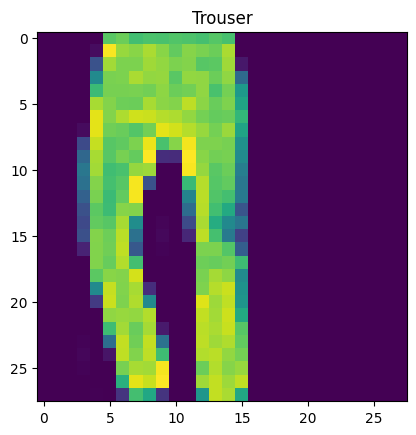

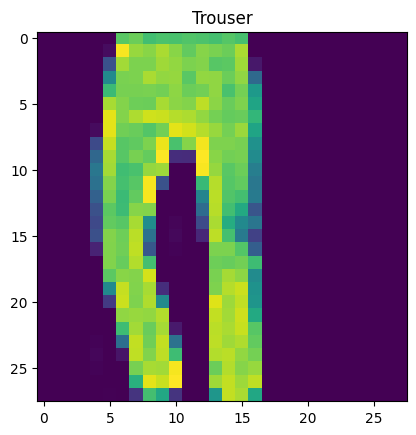

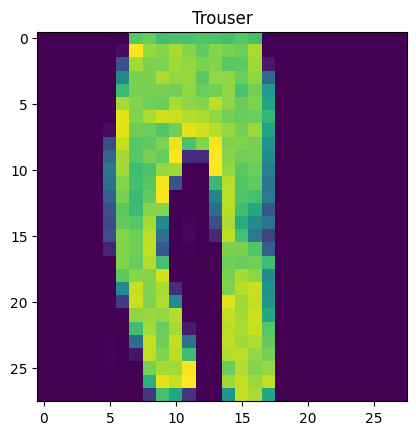

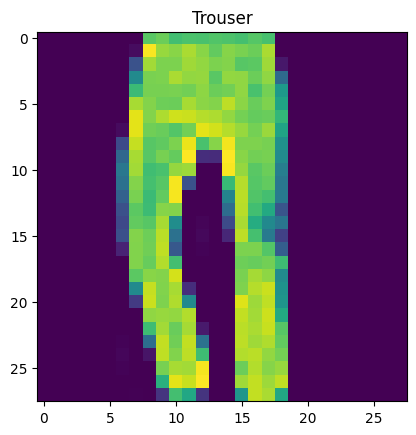

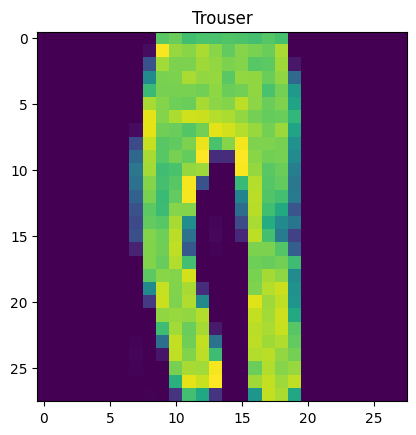

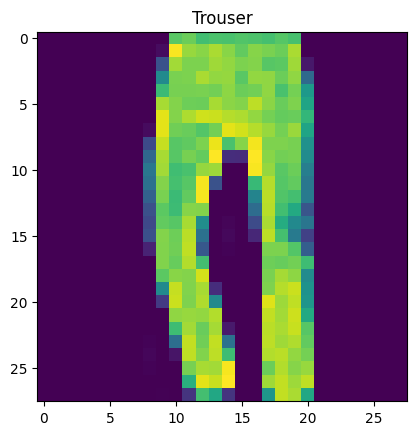

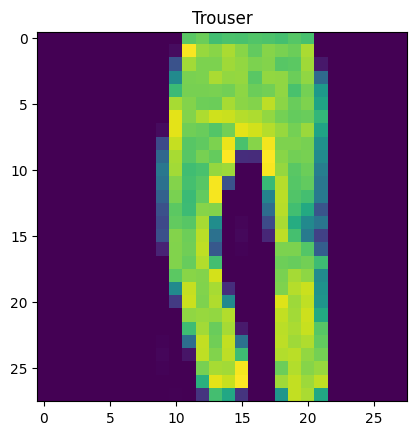

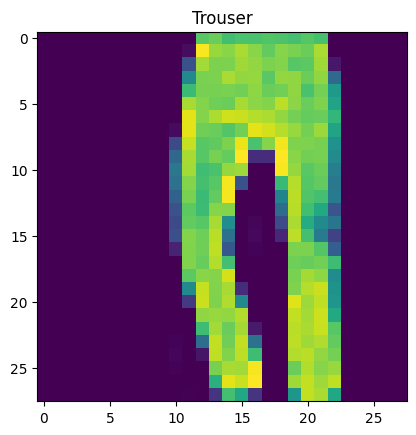

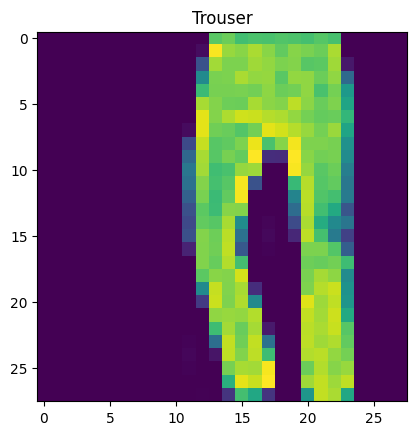

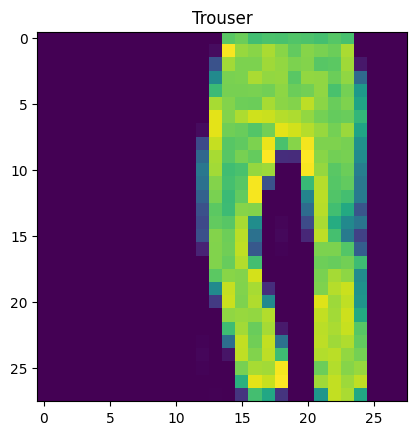

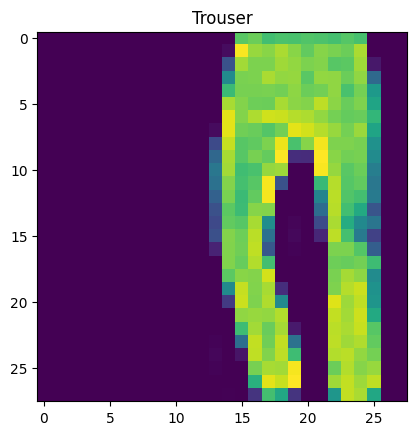

In [35]:
preds = []
ix = 24300
# melhores previsoes 
for px in range(-5,6):
    img = tr_images[ix]/255.
    img = img.view(28, 28)
    img2 = np.roll(img, px, axis=1)
    img3 = torch.Tensor(img2).view(-1,1,28,28).to(device)
    np_output = model(img3).cpu().detach().numpy()
    pred = np.exp(np_output)/np.sum(np.exp(np_output))
    preds.append(pred)
    plt.imshow(img2)
    plt.title(fmnist.classes[pred[0].argmax()])
    plt.show()

### vanilla autoencoders 

In [37]:
from torch_snippets import *
from torchvision.datasets import MNIST
from torchvision import transforms,
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device 

'cuda'

In [38]:
# pre processamento das imagens 
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5]),
    transforms.Lambda(lambda x: x.to(device))
])

In [39]:
trn_ds = MNIST('~/data/', transform=img_transform, train=True, download=True)
val_ds = MNIST('~/data/', transform=img_transform, train=False, download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting /home/williansoder/data/MNIST/raw/train-images-idx3-ubyte.gz to /home/williansoder/data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting /home/williansoder/data/MNIST/raw/train-labels-idx1-ubyte.gz to /home/williansoder/data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting /home/williansoder/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /home/williansoder/data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting /home/williansoder/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /home/williansoder/data/MNIST/raw



In [40]:
batch_size = 256
# carregando os dados 
trn_dl = DataLoader(trn_ds, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

In [41]:
# definindo o auto encoder 
class AutoEncoder(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.latend_dim = latent_dim
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128), nn.ReLU(True), # Primeira camada do codificador
            nn.Linear(128, 64), nn.ReLU(True), # Segunda camada do codificador
            #nn.Linear(64, 12),  nn.ReLU(True), 
            nn.Linear(64, latent_dim))
        self.decoder = nn.Sequential(
            #nn.Linear(latent_dim, 12), nn.ReLU(True),
            nn.Linear(latent_dim, 64), nn.ReLU(True),
            nn.Linear(64, 128), nn.ReLU(True), 
            nn.Linear(128, 28 * 28), nn.Tanh())
    # remodelando a entrada e saida 
    def forward(self, x):
        x = x.view(len(x), -1)
        x = self.encoder(x)
        x = self.decoder(x)
        x = x.view(len(x), 1, 28, 28)
        return x # Retornando a imagem reconstruída

In [42]:
# função de treinamento por lote 
def train_batch(input, model, criterion, optimizer):
    model.train()
    optimizer.zero_grad()
    output = model(input)
    loss = criterion(output, input)
    loss.backward()
    optimizer.step()
    return loss

@torch.no_grad()
def validate_batch(input, model, criterion):
    model.eval()
    output = model(input)
    loss = criterion(output, input)
    return loss

In [ ]:
model = AutoEncoder(3).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)

num_epochs = 5
log = Report(num_epochs)
# treinando o modelo 
for epoch in range(num_epochs):
    N = len(trn_dl)
    for ix, (data, _) in enumerate(trn_dl):
        loss = train_batch(data, model, criterion, optimizer)
        log.record(pos=(epoch + (ix+1)/N), trn_loss=loss, end='\r')

    N = len(val_dl)
    for ix, (data, _) in enumerate(val_dl):
        loss = validate_batch(data, model, criterion)
        log.record(pos=(epoch + (ix+1)/N), val_loss=loss, end='\r')
    log.report_avgs(epoch+1)
log.plot(log=True) # plotando os resultados 

In [ ]:
# plotando resultados 
for _ in range(3):
    ix = np.random.randint(len(val_ds))
    im, _ = val_ds[ix]
    _im = model(im[None])[0]
    fig, ax = plt.subplots(1,2,figsize=(3,3)) 
    show(im[0], ax=ax[0], title='input')
    show(_im[0], ax=ax[1], title='prediction')
    plt.tight_layout()
    plt.show()

# treinando a rede novamente 
def train_aec(latent_dim):
    model = AutoEncoder(latent_dim).to(device)
    criterion = nn.MSELoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)

    num_epochs = 5
    log = Report(num_epochs)

    for epoch in range(num_epochs):
        N = len(trn_dl)
        for ix, (data, _) in enumerate(trn_dl):
            loss = train_batch(data, model, criterion, optimizer)
            log.record(pos=(epoch + (ix+1)/N), trn_loss=loss, end='\r')

        N = len(val_dl)
        for ix, (data, _) in enumerate(val_dl):
            loss = validate_batch(data, model, criterion)
            log.record(pos=(epoch + (ix+1)/N), val_loss=loss, end='\r')
        log.report_avgs(epoch+1)
    log.plot(log=True)
    return model

aecs = [train_aec(dim) for dim in [50, 2, 3, 5, 10]] 

# plotando resultados 
for _ in range(10):
    ix = np.random.randint(len(val_ds))
    im, _ = val_ds[ix]
    fig, ax = plt.subplots(1, len(aecs)+1, figsize=(10,4))
    ax = iter(ax.flat)
    show(im[0], ax=next(ax), title='input')
    for model in aecs:
        _im = model(im[None])[0]
        show(_im[0], ax=next(ax), title=f'prediction\nlatent-dim:{model.latend_dim}')
    plt.tight_layout()
    plt.show()

In [ ]:
from torch_snippets import *
from torchvision.datasets import MNIST
from torchvision import transforms
device = 'cuda' if torch.cuda.is_available() else 'cpu'
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5]),
    transforms.Lambda(lambda x: x.to(device))
])

# dados de treino e teste 
trn_ds = MNIST('/content/', transform=img_transform, train=True, download=True)
val_ds = MNIST('/content/', transform=img_transform, train=False, download=True)

batch_size = 128
trn_dl = DataLoader(trn_ds, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

In [ ]:
# autoencoder 
from torchsummary import summary
class ConvAutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        # camadas do encoder 
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 3, stride=3, padding=1), nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(32, 64, 3, stride=2, padding=1), nn.ReLU(True),
            nn.MaxPool2d(2, stride=1)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 3, stride=2), nn.ReLU(True),
            nn.ConvTranspose2d(32, 16, 5, stride=3, padding=1), nn.ReLU(True),
            nn.ConvTranspose2d(16, 1, 2, stride=2, padding=1), nn.Tanh()
        )
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
model = ConvAutoEncoder().to(device)
summary(model, torch.zeros(2,1,28,28));

In [ ]:
# realizar o treinamento de cada lote 
def train_batch(input, model, criterion, optimizer):
    model.train()
    optimizer.zero_grad()
    output = model(input)
    loss = criterion(output, input)
    loss.backward()
    optimizer.step()
    return loss

@torch.no_grad()
def validate_batch(input, model, criterion):
    model.eval()
    output = model(input)
    loss = criterion(output, input)
    return loss

# cirando modelo e otimizador 
model = ConvAutoEncoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)

num_epochs = 5
log = Report(num_epochs)

for epoch in range(num_epochs):
    N = len(trn_dl)
    for ix, (data, _) in enumerate(trn_dl):
        loss = train_batch(data, model, criterion, optimizer)
        log.record(pos=(epoch + (ix+1)/N), trn_loss=loss, end='\r')
        
    N = len(val_dl)
    for ix, (data, _) in enumerate(val_dl):
        loss = validate_batch(data, model, criterion)
        log.record(pos=(epoch + (ix+1)/N), val_loss=loss, end='\r')
        
    log.report_avgs(epoch+1)

In [66]:
from torch_snippets import *
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import make_grid
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# criando datasets de treino e teste 
train_dataset = datasets.MNIST(root='MNIST/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='MNIST/', train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

Using downloaded and verified file: MNIST/MNIST/raw/train-images-idx3-ubyte.gz
Extracting MNIST/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/MNIST/raw



In [67]:
train_dataset[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [69]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        
        # Encoder
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 256)
        self.fc21 = nn.Linear(256, 20)  # mu
        self.fc22 = nn.Linear(256, 20)  # logvar
        
        # Decoder
        self.fc3 = nn.Linear(20, 256)
        self.fc4 = nn.Linear(256, 64 * 7 * 7)
        self.deconv1 = nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.deconv2 = nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1)
        
    def encode(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        mu = self.fc21(x)
        logvar = self.fc22(x)
        return mu, logvar
    
    def reparameterize(self, mu, logvar):
        if self.training:
            std = torch.exp(0.5 * logvar)
            eps = Variable(torch.randn(std.size())).cuda()
            return eps.mul(std).add_(mu)
        else:
            return mu
    
    def decode(self, z):
        z = F.relu(self.fc3(z))
        z = F.relu(self.fc4(z))
        z = z.view(z.size(0), 64, 7, 7)
        z = F.relu(self.deconv1(z))
        z = torch.sigmoid(self.deconv2(z))
        return z
    def forward(self, x):
            mu, logvar = self.encode(x)
            z = self.reparameterize(mu, logvar)
            z = self.decode(z)
            return z, mu, logvar

In [70]:
# função para realziar o treinamento de cada lote 
def train_batch(data, model, optimizer, loss_function):
    model.train()
    data = data.to(device)
    optimizer.zero_grad()
    recon_batch, mean, log_var = model(data)
    loss, mse, kld = loss_function(recon_batch, data, mean, log_var)
    loss.backward()
    optimizer.step()
    return loss, mse, kld, log_var.mean(), mean.mean()



@torch.no_grad()
def validate_batch(data, model, loss_function):
    model.eval()
    data = data.to(device)
    recon, mean, log_var = model(data)
    loss, mse, kld = loss_function(recon, data, mean, log_var)
    return loss, mse, kld, log_var.mean(), mean.mean()

# função de perda 
def loss_function(recon_x, x, mean, log_var):
    RECON = F.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mean.pow(2) - log_var.exp())
    return RECON + KLD, RECON, KLD

In [ ]:
n_epochs = 10
log = Report(n_epochs)
vae = VAE().to(device)
optimizer = optim.AdamW(vae.parameters(), lr=1e-3)


# treianmento em 10 iterações 
for epoch in range(n_epochs):
    N = len(train_loader)
    for batch_idx, (data, _) in enumerate(train_loader):
        loss, recon, kld, log_var, mean = train_batch(data, vae, optimizer, loss_function)
        pos = epoch + (1+batch_idx)/N
        log.record(pos, train_loss=loss, train_kld=kld, train_recon=recon, train_log_var=log_var, train_mean=mean, end='\r')
        
    N = len(test_loader)
    for batch_idx, (data, _) in enumerate(test_loader):
        loss, recon, kld, log_var, mean = validate_batch(data, vae, loss_function)
        pos = epoch + (1+batch_idx)/N
        log.record(pos, val_loss=loss, val_kld=kld, val_recon=recon, val_log_var=log_var, val_mean=mean, end='\r')
        
    log.report_avgs(epoch+1)
    with torch.no_grad():
        z = torch.randn(64, 20).to(device)
        sample = vae.decode(z).to(device)
        images = make_grid(sample.view(64, 1, 28, 28)).permute(1,2,0)
        show(images)

In [72]:
from torch_snippets import *
from torchvision import transforms as T
from torch.nn import functional as F
from torchvision.models import vgg19
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# preprocessamento 
preprocess = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    T.Lambda(lambda x: x.mul_(255))
])
postprocess = T.Compose([
    T.Lambda(lambda x: x.mul_(1./255)),
    T.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225], std=[1/0.229, 1/0.224, 1/0.225]),
])

In [73]:
# GramMatrix
class GramMatrix(nn.Module):
    def forward(self, input):
        b,c,h,w = input.size()
        feat = input.view(b, c, h*w)
        G = feat@feat.transpose(1,2)
        G.div_(h*w)
        return G
# perca
class GramMSELoss(nn.Module):
    def forward(self, input, target):
        out = F.mse_loss(GramMatrix()(input), target)
        return(out)
class vgg19_modified(nn.Module):
    def __init__(self):
        super().__init__()
        features = list(vgg19(pretrained = True).features)
        self.features = nn.ModuleList(features).eval() 
    def forward(self, x, layers=[]):
        order = np.argsort(layers)
        _results, results = [], []
        for ix,model in enumerate(self.features):
            x = model(x)
            if ix in layers: _results.append(x)
        for o in order: results.append(_results[o])
        return results if layers is not [] else x

In [ ]:
vgg = vgg19_modified().to(device)

In [76]:
!wget https://easydrawingguides.com/wp-content/uploads/2016/10/how-to-draw-an-elephant-featured-image-1200-1024x822.png
!wget https://www.neh.gov/sites/default/files/2022-09/Fall_2022_web-images_Picasso_32.jpg

--2024-08-26 15:05:35--  https://easydrawingguides.com/wp-content/uploads/2016/10/how-to-draw-an-elephant-featured-image-1200-1024x822.png
Resolvendo easydrawingguides.com (easydrawingguides.com)... 104.16.150.108, 104.16.151.108, 2606:4700::6810:976c, ...
Conectando-se a easydrawingguides.com (easydrawingguides.com)|104.16.150.108|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 188359 (184K) [image/png]
Salvando em: ‘how-to-draw-an-elephant-featured-image-1200-1024x822.png’

how-to-draw-an-elep 100%[===================>] 183,94K  --.-KB/s    em 0,06s   

2024-08-26 15:05:50 (3,22 MB/s) - ‘how-to-draw-an-elephant-featured-image-1200-1024x822.png’ salvo [188359/188359]

--2024-08-26 15:05:50--  https://www.neh.gov/sites/default/files/2022-09/Fall_2022_web-images_Picasso_32.jpg
Resolvendo www.neh.gov (www.neh.gov)... 23.21.228.79
Conectando-se a www.neh.gov (www.neh.gov)|23.21.228.79|:443... conectado.
A requisição HTTP foi enviada, aguardando res

In [77]:
!ls

 ab6761610000e5eb31f6ab67e6025de876475814
'card18(aulas).ipynb'
 dense_network.png
 Fall_2022_web-images_Picasso_32.jpg
 how-to-draw-an-elephant-featured-image-1200-1024x822.png
 MNIST
 tensor.html


In [ ]:
imgs = [Image.open(path).resize((512,512)).convert('RGB') for path in ['Fall_2022_web-images_Picasso_32.jpg', 'how-to-draw-an-elephant-featured-image-1200-1024x822.png']]
style_image, content_image = [preprocess(img).to(device)[None] for img in imgs]

opt_img = content_image.data.clone()
opt_img.requires_grad = True

style_layers = [0, 5, 10, 19, 28] 
content_layers = [21]
loss_layers = style_layers + content_layers

loss_fns = [GramMSELoss()] * len(style_layers) + [nn.MSELoss()] * len(content_layers)
loss_fns = [loss_fn.to(device) for loss_fn in loss_fns]

style_weights = [1000/n**2 for n in [64,128,256,512,512]] 
content_weights = [1]
weights = style_weights + content_weights

style_targets = [GramMatrix()(A).detach() for A in vgg(style_image, style_layers)]
content_targets = [A.detach() for A in vgg(content_image, content_layers)]
targets = style_targets + content_targets

max_iters = 500
optimizer = optim.LBFGS([opt_img])
log = Report(max_iters)

In [ ]:
iters = 0
max_iters = 500
while iters < max_iters:
    def closure():
        global iters
        iters += 1
        optimizer.zero_grad()
        out = vgg(opt_img, loss_layers)
        layer_losses = [weights[a] * loss_fns[a](A, targets[a]) for a,A in enumerate(out)]
        loss = sum(layer_losses)
        loss.backward()
        log.record(pos=iters, loss=loss, end='\r')
        return loss
    optimizer.step(closure)

In [ ]:
with torch.no_grad():
    out_img = postprocess(opt_img[0]).permute(1,2,0)
show(out_img)